In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))

100%|██████████| 16992/16992 [00:00<00:00, 189174.03it/s]

Train data length: 1958
Test data length: 224
Img Shape: torch.Size([1, 75, 75])
Number of Labels: 15


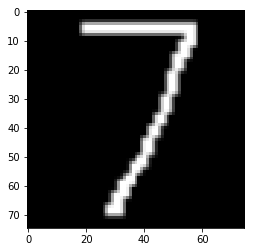

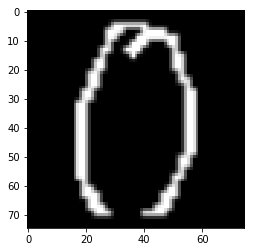

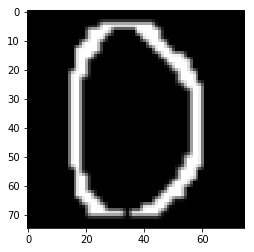

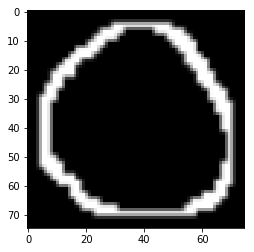

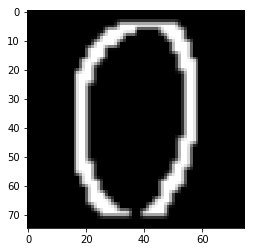

In [2]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(hasy_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()

In [3]:
# Train with a pretrained model from PyTorch
from torchvision import models
from torch.nn import Conv2d

pretrained = False
torch_model = models.densenet201(num_classes=15)
torch_model.features.conv0 = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
if pretrained:
    torch_model.load_state_dict(torch.load('pretrained-model-01.ckpt'))
epochs = 55
optimizer = torch.optim.Adam(torch_model.parameters(), lr=0.001, betas=(0.8, 0.925), weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

def calc_accuracy(model):
    accuracies = []
    for idx, [x_test, y_test] in enumerate(test_loader):
        test_pred = model(x_test)
        accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
        accuracies.append(accuracy)
    return np.mean(accuracies)

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = torch_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 50 == 0:
                print('Loss: {}'.format(loss))
                acc = calc_accuracy(torch_model)       
                print("Accuracy: {0}".format(acc)) 
                if acc > 50:
                    torch.save(torch_model.state_dict(), 'model_acc_{0}.ckpt'.format(acc))

  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 0
Loss: 2.759082555770874


  1%|          | 1/123 [00:06<13:16,  6.53s/it]

Accuracy: 26.339284896850586


 41%|████      | 50/123 [01:14<01:39,  1.37s/it]

Loss: 0.7613245248794556


 41%|████▏     | 51/123 [01:22<03:50,  3.20s/it]

Accuracy: 40.17856979370117


 81%|████████▏ | 100/123 [02:30<00:32,  1.40s/it]

Loss: 0.362329363822937


 82%|████████▏ | 101/123 [02:38<01:12,  3.28s/it]

Accuracy: 39.28571319580078


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 1
Loss: 0.4423333406448364


  1%|          | 1/123 [00:07<15:27,  7.60s/it]

Accuracy: 45.53571319580078


 41%|████      | 50/123 [01:16<01:42,  1.40s/it]

Loss: 0.6667721271514893


 41%|████▏     | 51/123 [01:23<03:55,  3.27s/it]

Accuracy: 48.66071319580078


 81%|████████▏ | 100/123 [02:34<00:32,  1.43s/it]

Loss: 0.40067002177238464


 82%|████████▏ | 101/123 [02:41<01:13,  3.34s/it]

Accuracy: 48.21428680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 2
Loss: 1.0127346515655518


  1%|          | 1/123 [00:07<15:40,  7.71s/it]

Accuracy: 49.10714340209961


 41%|████      | 50/123 [01:18<01:43,  1.42s/it]

Loss: 0.5331636667251587


 41%|████▏     | 51/123 [01:25<04:00,  3.34s/it]

Accuracy: 48.21428680419922


 81%|████████▏ | 100/123 [02:35<00:32,  1.39s/it]

Loss: 0.6502055525779724


 82%|████████▏ | 101/123 [02:43<01:13,  3.32s/it]

Accuracy: 47.76785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 3
Loss: 0.893043041229248


  1%|          | 1/123 [00:07<15:59,  7.87s/it]

Accuracy: 50.89285659790039


 41%|████      | 50/123 [01:14<01:34,  1.30s/it]

Loss: 0.6598238348960876


 41%|████▏     | 51/123 [01:21<03:39,  3.05s/it]

Accuracy: 50.44643020629883


 81%|████████▏ | 100/123 [02:25<00:30,  1.32s/it]

Loss: 0.32543283700942993


 82%|████████▏ | 101/123 [02:32<01:07,  3.07s/it]

Accuracy: 51.78571319580078


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 4
Loss: 0.8271721601486206


  1%|          | 1/123 [00:07<14:17,  7.03s/it]

Accuracy: 46.875


 41%|████      | 50/123 [01:11<01:35,  1.30s/it]

Loss: 0.3759538233280182


 41%|████▏     | 51/123 [01:18<03:38,  3.03s/it]

Accuracy: 47.76785659790039


 81%|████████▏ | 100/123 [02:22<00:30,  1.32s/it]

Loss: 0.5212616920471191


 82%|████████▏ | 101/123 [02:29<01:07,  3.07s/it]

Accuracy: 47.32143020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 5
Loss: 0.4106226861476898


  1%|          | 1/123 [00:07<14:16,  7.02s/it]

Accuracy: 41.51785659790039


 41%|████      | 50/123 [01:11<01:33,  1.28s/it]

Loss: 0.17904195189476013


 41%|████▏     | 51/123 [01:18<03:39,  3.05s/it]

Accuracy: 51.33928680419922


 81%|████████▏ | 100/123 [02:22<00:30,  1.32s/it]

Loss: 0.29496103525161743


 82%|████████▏ | 101/123 [02:29<01:07,  3.06s/it]

Accuracy: 55.35714340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 6
Loss: 0.4457630515098572


  1%|          | 1/123 [00:07<14:22,  7.07s/it]

Accuracy: 48.21428680419922


 41%|████      | 50/123 [01:11<01:34,  1.29s/it]

Loss: 0.1118941605091095
Accuracy: 50.44643020629883


 81%|████████▏ | 100/123 [02:23<00:29,  1.30s/it]

Loss: 0.3145318627357483
Accuracy: 51.33928680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 7
Loss: 0.23374809324741364


  1%|          | 1/123 [00:07<14:23,  7.07s/it]

Accuracy: 47.32143020629883


 41%|████      | 50/123 [01:11<01:37,  1.33s/it]

Loss: 0.18245655298233032


 41%|████▏     | 51/123 [01:19<03:39,  3.05s/it]

Accuracy: 43.75


 81%|████████▏ | 100/123 [02:23<00:30,  1.31s/it]

Loss: 0.3804784417152405


 82%|████████▏ | 101/123 [02:30<01:06,  3.04s/it]

Accuracy: 49.10714340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 8
Loss: 0.35606086254119873


  1%|          | 1/123 [00:07<14:22,  7.07s/it]

Accuracy: 47.76785659790039


 41%|████      | 50/123 [01:11<01:35,  1.31s/it]

Loss: 0.2919807434082031


 41%|████▏     | 51/123 [01:18<03:38,  3.03s/it]

Accuracy: 48.66071319580078


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.2452876716852188


 82%|████████▏ | 101/123 [02:30<01:07,  3.07s/it]

Accuracy: 48.21428680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 9
Loss: 0.18903735280036926
Accuracy: 51.33928680419922


 41%|████      | 50/123 [01:16<01:42,  1.40s/it]

Loss: 0.3247063457965851
Accuracy: 50.44643020629883


 81%|████████▏ | 100/123 [02:39<00:33,  1.46s/it]

Loss: 0.3155944049358368


 82%|████████▏ | 101/123 [02:46<01:13,  3.35s/it]

Accuracy: 48.21428680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 10
Loss: 0.1696443408727646


  1%|          | 1/123 [00:07<15:36,  7.68s/it]

Accuracy: 48.21428680419922


 41%|████      | 50/123 [01:17<01:42,  1.40s/it]

Loss: 0.42184174060821533


 41%|████▏     | 51/123 [01:25<03:58,  3.32s/it]

Accuracy: 52.23214340209961


 81%|████████▏ | 100/123 [02:35<00:33,  1.43s/it]

Loss: 0.24443352222442627


 82%|████████▏ | 101/123 [02:43<01:12,  3.32s/it]

Accuracy: 47.76785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 11
Loss: 0.1786840856075287


  1%|          | 1/123 [00:07<16:02,  7.89s/it]

Accuracy: 54.01785659790039


 41%|████      | 50/123 [01:19<01:42,  1.41s/it]

Loss: 0.5972785949707031
Accuracy: 52.23214340209961


 81%|████████▏ | 100/123 [02:37<00:33,  1.45s/it]

Loss: 0.1932087242603302
Accuracy: 51.33928680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 12
Loss: 0.3421756625175476


  1%|          | 1/123 [00:07<15:50,  7.79s/it]

Accuracy: 52.67856979370117


 41%|████      | 50/123 [01:17<01:44,  1.44s/it]

Loss: 0.1953439712524414
Accuracy: 51.78571319580078


 81%|████████▏ | 100/123 [02:35<00:31,  1.36s/it]

Loss: 0.15649402141571045
Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 13
Loss: 0.35594087839126587


  1%|          | 1/123 [00:07<14:25,  7.09s/it]

Accuracy: 48.66071319580078


 41%|████      | 50/123 [01:11<01:37,  1.33s/it]

Loss: 0.13450472056865692


 41%|████▏     | 51/123 [01:18<03:40,  3.07s/it]

Accuracy: 54.46428680419922


 81%|████████▏ | 100/123 [02:22<00:29,  1.28s/it]

Loss: 0.19303326308727264


 82%|████████▏ | 101/123 [02:29<01:07,  3.05s/it]

Accuracy: 46.42856979370117


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 14
Loss: 0.1184171587228775


  1%|          | 1/123 [00:07<14:17,  7.03s/it]

Accuracy: 44.19643020629883


 41%|████      | 50/123 [01:10<01:36,  1.32s/it]

Loss: 0.059209734201431274
Accuracy: 52.67856979370117


 81%|████████▏ | 100/123 [02:22<00:30,  1.32s/it]

Loss: 0.10007989406585693


 82%|████████▏ | 101/123 [02:29<01:07,  3.09s/it]

Accuracy: 53.57143020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 15
Loss: 0.14475464820861816


  1%|          | 1/123 [00:07<14:31,  7.14s/it]

Accuracy: 53.125


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.09732180833816528
Accuracy: 50.89285659790039


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.06425699591636658


 82%|████████▏ | 101/123 [02:30<01:07,  3.07s/it]

Accuracy: 56.69643020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 16
Loss: 0.2797001004219055
Accuracy: 52.67856979370117


 41%|████      | 50/123 [01:11<01:33,  1.28s/it]

Loss: 0.07611791789531708
Accuracy: 50.89285659790039


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.1461949348449707
Accuracy: 53.125


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 17
Loss: 0.06321002542972565
Accuracy: 55.35714340209961


 41%|████      | 50/123 [01:11<01:35,  1.31s/it]

Loss: 0.3342217206954956


 41%|████▏     | 51/123 [01:18<03:38,  3.04s/it]

Accuracy: 49.10714340209961


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.04157230257987976
Accuracy: 50.89285659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 18
Loss: 0.10908916592597961


  1%|          | 1/123 [00:07<14:22,  7.07s/it]

Accuracy: 49.55356979370117


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.11328966915607452
Accuracy: 51.33928680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.31s/it]

Loss: 0.4139648377895355
Accuracy: 52.23214340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 19
Loss: 0.12204283475875854


  1%|          | 1/123 [00:07<14:21,  7.06s/it]

Accuracy: 49.10714340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.06592804193496704


 41%|████▏     | 51/123 [01:18<03:39,  3.05s/it]

Accuracy: 46.42856979370117


 81%|████████▏ | 100/123 [02:22<00:30,  1.32s/it]

Loss: 0.16639605164527893
Accuracy: 50.89285659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 20
Loss: 0.15689292550086975
Accuracy: 51.78571319580078


 41%|████      | 50/123 [01:11<01:37,  1.34s/it]

Loss: 0.13556545972824097


 41%|████▏     | 51/123 [01:18<03:40,  3.06s/it]

Accuracy: 48.21428680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.11153274774551392


 82%|████████▏ | 101/123 [02:30<01:07,  3.06s/it]

Accuracy: 49.55356979370117


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 21
Loss: 0.09025377035140991


  1%|          | 1/123 [00:07<14:17,  7.03s/it]

Accuracy: 46.42856979370117


 41%|████      | 50/123 [01:11<01:36,  1.33s/it]

Loss: 0.2818318009376526


 41%|████▏     | 51/123 [01:19<03:40,  3.06s/it]

Accuracy: 48.21428680419922


 81%|████████▏ | 100/123 [02:23<00:29,  1.29s/it]

Loss: 0.23949848115444183


 82%|████████▏ | 101/123 [02:30<01:06,  3.03s/it]

Accuracy: 46.875


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 22
Loss: 0.3958486318588257


  1%|          | 1/123 [00:07<14:25,  7.09s/it]

Accuracy: 50.0


 41%|████      | 50/123 [01:11<01:33,  1.28s/it]

Loss: 0.2772414982318878
Accuracy: 54.01785659790039


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.13606929779052734
Accuracy: 51.33928680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 23
Loss: 0.1474044770002365
Accuracy: 52.67856979370117


 41%|████      | 50/123 [01:11<01:34,  1.30s/it]

Loss: 0.1427796483039856
Accuracy: 54.01785659790039


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.13465936481952667
Accuracy: 50.44643020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 24
Loss: 0.2715268135070801
Accuracy: 52.23214340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.18343564867973328


 41%|████▏     | 51/123 [01:18<03:39,  3.05s/it]

Accuracy: 49.55356979370117


 81%|████████▏ | 100/123 [02:22<00:30,  1.32s/it]

Loss: 0.1945425122976303
Accuracy: 52.23214340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 25
Loss: 0.07209208607673645
Accuracy: 53.57143020629883


 41%|████      | 50/123 [01:12<01:33,  1.29s/it]

Loss: 0.08418159186840057
Accuracy: 52.23214340209961


 81%|████████▏ | 100/123 [02:24<00:29,  1.27s/it]

Loss: 0.10870522260665894
Accuracy: 53.125


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 26
Loss: 0.09078490734100342
Accuracy: 52.67856979370117


 41%|████      | 50/123 [01:11<01:34,  1.30s/it]

Loss: 0.07758565247058868


 41%|████▏     | 51/123 [01:18<03:39,  3.04s/it]

Accuracy: 49.55356979370117


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.05365040898323059
Accuracy: 52.23214340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 27
Loss: 0.07012706995010376
Accuracy: 51.33928680419922


 41%|████      | 50/123 [01:12<01:36,  1.32s/it]

Loss: 0.1411515176296234


 41%|████▏     | 51/123 [01:19<03:39,  3.05s/it]

Accuracy: 49.55356979370117


 81%|████████▏ | 100/123 [02:24<00:30,  1.33s/it]

Loss: 0.10042893886566162


 82%|████████▏ | 101/123 [02:31<01:08,  3.10s/it]

Accuracy: 57.58928680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 28
Loss: 0.20418182015419006
Accuracy: 51.78571319580078


 41%|████      | 50/123 [01:12<01:36,  1.33s/it]

Loss: 0.15672360360622406
Accuracy: 50.89285659790039


 81%|████████▏ | 100/123 [02:24<00:30,  1.33s/it]

Loss: 0.06974244117736816
Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 29
Loss: 0.08869555592536926


  1%|          | 1/123 [00:07<14:24,  7.09s/it]

Accuracy: 49.10714340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.0814199447631836
Accuracy: 54.01785659790039


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.1393619328737259
Accuracy: 50.89285659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 30
Loss: 0.05810546875
Accuracy: 52.23214340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.11269280314445496
Accuracy: 50.44643020629883


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.06269292533397675
Accuracy: 55.35714340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 31
Loss: 0.18144655227661133


  1%|          | 1/123 [00:07<14:21,  7.07s/it]

Accuracy: 49.10714340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.15134254097938538
Accuracy: 53.57143020629883


 81%|████████▏ | 100/123 [02:23<00:29,  1.30s/it]

Loss: 0.18229539692401886
Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 32
Loss: 0.2748359441757202


  1%|          | 1/123 [00:07<14:30,  7.13s/it]

Accuracy: 54.91071319580078


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.04264712333679199
Accuracy: 55.35714340209961


 81%|████████▏ | 100/123 [02:23<00:30,  1.33s/it]

Loss: 0.1304984986782074
Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 33
Loss: 0.03830862045288086
Accuracy: 54.91071319580078


 41%|████      | 50/123 [01:12<01:35,  1.30s/it]

Loss: 0.08418013155460358
Accuracy: 52.23214340209961


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.07809005677700043
Accuracy: 53.57143020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 34
Loss: 0.0534149706363678
Accuracy: 53.57143020629883


 41%|████      | 50/123 [01:11<01:35,  1.31s/it]

Loss: 0.056329041719436646
Accuracy: 55.35714340209961


 81%|████████▏ | 100/123 [02:23<00:30,  1.31s/it]

Loss: 0.1329696923494339
Accuracy: 57.58928680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 35
Loss: 0.28061771392822266
Accuracy: 53.57143020629883


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.23462677001953125
Accuracy: 54.46428680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.31s/it]

Loss: 0.39320945739746094


 82%|████████▏ | 101/123 [02:30<01:07,  3.09s/it]

Accuracy: 54.91071319580078


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 36
Loss: 0.1425575315952301
Accuracy: 53.125


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.09202274680137634


 41%|████▏     | 51/123 [01:18<03:41,  3.07s/it]

Accuracy: 57.14285659790039


 81%|████████▏ | 100/123 [02:22<00:30,  1.31s/it]

Loss: 0.08395618200302124
Accuracy: 54.46428680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 37
Loss: 0.12371601164340973
Accuracy: 55.35714340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.08418157696723938
Accuracy: 54.46428680419922


 81%|████████▏ | 100/123 [02:23<00:29,  1.30s/it]

Loss: 0.2274799793958664


 82%|████████▏ | 101/123 [02:30<01:07,  3.05s/it]

Accuracy: 56.25


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 38
Loss: 0.12102018296718597


  1%|          | 1/123 [00:07<14:25,  7.10s/it]

Accuracy: 49.55356979370117


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.1471504122018814
Accuracy: 52.67856979370117


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.22466181218624115
Accuracy: 53.57143020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 39
Loss: 0.39626097679138184


  1%|          | 1/123 [00:07<14:30,  7.14s/it]

Accuracy: 55.80356979370117


 41%|████      | 50/123 [01:11<01:36,  1.33s/it]

Loss: 0.07973562180995941
Accuracy: 57.58928680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.0672178715467453
Accuracy: 54.91071319580078


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 40
Loss: 0.046378761529922485
Accuracy: 50.89285659790039


 41%|████      | 50/123 [01:12<01:37,  1.33s/it]

Loss: 0.14834828674793243
Accuracy: 51.33928680419922


 81%|████████▏ | 100/123 [02:24<00:30,  1.31s/it]

Loss: 0.08444216847419739
Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 41
Loss: 0.08449661731719971
Accuracy: 52.67856979370117


 41%|████      | 50/123 [01:12<01:36,  1.33s/it]

Loss: 0.3761689364910126
Accuracy: 55.80356979370117


 81%|████████▏ | 100/123 [02:24<00:30,  1.33s/it]

Loss: 0.278604656457901
Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 42
Loss: 0.13447798788547516
Accuracy: 55.35714340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.3829476535320282
Accuracy: 53.125


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.0664670467376709
Accuracy: 56.25


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 43
Loss: 0.044976383447647095
Accuracy: 53.125


 41%|████      | 50/123 [01:11<01:32,  1.27s/it]

Loss: 0.07150690257549286
Accuracy: 54.91071319580078


 81%|████████▏ | 100/123 [02:23<00:29,  1.30s/it]

Loss: 0.1712406575679779
Accuracy: 57.14285659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 44
Loss: 0.13851739466190338
Accuracy: 56.25


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.09234350919723511


 41%|████▏     | 51/123 [01:18<03:39,  3.04s/it]

Accuracy: 50.0


 81%|████████▏ | 100/123 [02:22<00:30,  1.32s/it]

Loss: 0.07252338528633118
Accuracy: 51.33928680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 45
Loss: 0.10880443453788757
Accuracy: 53.125


 41%|████      | 50/123 [01:12<01:36,  1.33s/it]

Loss: 0.17306236922740936
Accuracy: 50.44643020629883


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.0859583169221878
Accuracy: 53.125


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 46
Loss: 0.1517009288072586
Accuracy: 54.46428680419922


 41%|████      | 50/123 [01:12<01:36,  1.32s/it]

Loss: 0.15015919506549835
Accuracy: 51.33928680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.04668611288070679
Accuracy: 53.125


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 47
Loss: 0.27430516481399536
Accuracy: 54.91071319580078


 41%|████      | 50/123 [01:12<01:36,  1.32s/it]

Loss: 0.1339699774980545


 41%|████▏     | 51/123 [01:19<03:39,  3.05s/it]

Accuracy: 45.98214340209961


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.20660512149333954
Accuracy: 54.46428680419922


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 48
Loss: 0.2894335985183716
Accuracy: 54.01785659790039


 41%|████      | 50/123 [01:11<01:34,  1.30s/it]

Loss: 0.17119929194450378


 41%|████▏     | 51/123 [01:18<03:37,  3.02s/it]

Accuracy: 50.0


 81%|████████▏ | 100/123 [02:22<00:29,  1.28s/it]

Loss: 0.03620421886444092


 82%|████████▏ | 101/123 [02:29<01:07,  3.07s/it]

Accuracy: 54.01785659790039


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 49
Loss: 0.06675244867801666
Accuracy: 52.23214340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.44204074144363403
Accuracy: 51.33928680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.15326227247714996
Accuracy: 52.23214340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 50
Loss: 0.04150421917438507
Accuracy: 51.33928680419922


 41%|████      | 50/123 [01:11<01:36,  1.33s/it]

Loss: 0.042594581842422485
Accuracy: 57.58928680419922


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.06890477240085602
Accuracy: 53.57143020629883


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 51
Loss: 0.06516437232494354
Accuracy: 54.46428680419922


 41%|████      | 50/123 [01:11<01:32,  1.27s/it]

Loss: 0.36161330342292786
Accuracy: 54.01785659790039


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.0612700879573822
Accuracy: 55.35714340209961


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 52
Loss: 0.18366312980651855
Accuracy: 54.91071319580078


 41%|████      | 50/123 [01:11<01:37,  1.33s/it]

Loss: 0.07981401681900024
Accuracy: 52.67856979370117


 81%|████████▏ | 100/123 [02:24<00:30,  1.32s/it]

Loss: 0.08341462910175323
Accuracy: 53.125


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 53
Loss: 0.13465483486652374
Accuracy: 52.23214340209961


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.04814364016056061
Accuracy: 51.78571319580078


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.08529837429523468
Accuracy: 51.78571319580078


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 54
Loss: 0.22975291311740875
Accuracy: 51.78571319580078


 41%|████      | 50/123 [01:11<01:36,  1.32s/it]

Loss: 0.13379885256290436
Accuracy: 52.67856979370117


 81%|████████▏ | 100/123 [02:23<00:30,  1.32s/it]

Loss: 0.31476712226867676
Accuracy: 56.69643020629883


100%|██████████| 123/123 [02:59<00:00,  1.23s/it]
